### Esercizio 1
Una prova consiste nel lancio di tre dadi equilibrati. Determinare la
probabilità dell’evento A “il punteggio totale è superiore a 15”

In [1]:
n = 6
r = 3

possibili = n**r
print(f"Casi possibili: {possibili}")

# totale > 15 (16, 17, 18)
way18 = 1 # 6, 6, 6
way17 = 3 # 6, 6, 5 col 5 che scorre su ogni posizione quindi * 3
way16 = 6 # 6, 6, 4 oppure 6, 5, 5  quindi 2 modi * 3
favorevoli = way16 + way17 + way18
print(f"Casi favorevoli: {favorevoli}")

P = favorevoli/possibili
print(f"Probabilità di totalizzare più di 15: {P:.3f}")

Casi possibili: 216
Casi favorevoli: 10
Probabilità di totalizzare più di 15: 0.046


In [2]:
n = 6
r = 3

possibili = n**r
print(f"Casi possibili: {possibili}")

favorevoli = 0
for i in range(6+1):
    for j in range(6+1):
        for k in range(6+1):
            if (i+j+k > 15):
                favorevoli+=1

print(f"Casi favorevoli: {favorevoli}")

P = favorevoli/possibili
print(f"Probabilità di totalizzare più di 15: {P:.3f}")

Casi possibili: 216
Casi favorevoli: 10
Probabilità di totalizzare più di 15: 0.046


### Esercizio 2
In una ditta dove si producono compact disc, un impiegato controlla un campione di 4 dischi su ogni partita
composta da 5000 CD da inviare ai rivenditori; se trova almeno un disco difettoso, la partita viene respinta.

Se in una partita ci sono 2 pezzi difettosi, qual è la probabilità che tale partita venga respinta?

In [3]:
from scipy.stats import binom

# Sia X la v.a che conta il numero il numero di dischi difettosi trovati 
# in una partita. Si vuole calcolare P(X >= 1)

n = 4
p = 2/5000
k = 0

P = binom.sf(k, n, p)
print(f'Probabilità: {P:.3f}')

Probabilità: 0.002


### Esercizio 3
Si lancia un dado per tre volte consecutive. Calcola la probabilità che:
1) si presentino tre facce con un numero divisibile per 3;
2) si presentino tre valori minori di 6;
3) si presentino prima due valori minori di 5 e infine uno maggiore di 4.

In [4]:
possibili = 6**3

P = (2/6)**3
print(f'Probabilità: {P:.3f}')

P = (5/6)**3
print(f'Probabilità: {P:.3f}')

P = (4/6)**2 * 2/6
print(f'Probabilità: {P:.3f}')

Probabilità: 0.037
Probabilità: 0.579
Probabilità: 0.148


### Esercizio 4
Nel gioco dello scarabeo, il sacchetto delle lettere contiene 130 lettere, di cui 12 A, 12 E, 4 P. Calcola la probabilità che, estraendo a caso dal sacchetto, si possa comporre la parola APE. Esegui il calcolo nel caso in cui a
ogni estrazione la lettera venga rimessa nel sacchetto e nel caso in cui le lettere estratte non possano essere
ripescate di nuovo. (Suggerimento. Ricorda che nel gioco dello scarabeo non ha importanza l’ordine in cui le
lettere sono estratte.)

In [5]:
import numpy as np
from scipy.stats import binom

n = 3
k = 1

A = 12/130
p1 = binom.pmf(k, n, A)

p2 = p1

E = 4/130
p3 = binom.pmf(k, n, E)

P = p1*p2*p3
print(f"Probabilità: {P:.3f}")

Probabilità: 0.005


In [6]:
from scipy.stats import hypergeom

b = 12
r = 130-b
k = 1
n = 3

p1 = hypergeom.pmf(k, b+r, b, n)
p2 = p1

b = 4
r = 130-b
p3 = hypergeom.pmf(k, b+r, b, n)

P = p1*p2*p3
print(f"Probabilità: {P:.3f}")

Probabilità: 0.005


### Esercizio 5
La direzione di un supermercato deve acquistare un nuovo freezer per l’esposizione dei surgelati in vendita. La durata di funzionamento in mesi di un primo modello di freezer per supermercato è descritta da una v.c. X con distribuzione
esponenziale di parametro θ = 0, 01.
1) Si valutino la durata attesa e quella mediana del freezer.
2) Si determini la probabilità che la durata del freezer sia superiore a 200 mesi.
3) Nell’ipotesi che il freezer sia già funzionante da 80 mesi, si calcoli la probabilità che questo funzioni per altri 200 mesi e la si confronti con la probabilità ottenuta al punto precedente.

In [7]:
from scipy.stats import expon

theta = 0.01

mu = int(1/theta)
print(f'Durata media: {mu}') # media teorica della esponenziale

# Mediana = secondo quantile
q = expon.ppf(1/2, scale=1/theta)
print(f'Durata mediana: {q:.3f}') # media teorica della esponenziale

Durata media: 100
Durata mediana: 69.315


In [8]:
k = 200
P = expon.sf(k, scale=1/theta)
print(f"Probabilità: {P:.3f}")

Probabilità: 0.135


In [9]:
# Poichè la distribuzione esponenziale gode della proprietà di
# mancanza di memoria si ha che P(X >= x+t | X >= x) = P(X >= t)

k = 280-80
P = expon.pdf(k, scale=1/theta)
print(f"Probabilità: {P:.3f}")

Probabilità: 0.001


### Esercizio 6
Sia X una variabile casuale normale che descrive la portata del fiume Adige
nel mese di Giugno nella località di Boara Pisani. È noto che in tale località la
portata media del fiume nel mese di giugno è di 243 metri cubici al secondo e che
P(X < 400) = 0, 9.
1) Si determini la varianza di X.
2) Supponendo che σ2 = 100, si determini la probabilità che in giugno il fiume Adige abbia una portata compresa fra 230 e 260 metri cubici al secondo.
3) Si supponga che Y = 10 + X sia la v.c. che descrive la portata del fiume Adige nella località di Boscochiaro. Supponendo che σ2 X = 100, si calcoli P(240<Y<270) e si confronti il valore ottenuto con quello ricavato al punto 2).

In [10]:
from scipy.stats import norm

mu = 243

sig = 1
while(True):
    if (np.round(norm.cdf(400, mu, sig), 3) == 0.9):
        break
    sig += 0.001

sig2 = sig**2
print(f'Deviazione standard: {sig}')
print(f'Varianza: {sig2}')

Deviazione standard: 122.2360000002196
Varianza: 14941.639696053688


In [11]:
sig2 = 100
sig = np.sqrt(sig2)

P = norm.cdf(260, mu, sig) - norm.cdf(230, mu, sig)
print(f"Probabilità: {P:.3f}")

Probabilità: 0.859


In [12]:
# Y = 10 + X
# E[Y] = E[10 + X] = 10 + E[X]
# VAR(Y) = VAR(10 + X) = VAR(X)

mu = mu+10
P = norm.cdf(270, mu, sig) - norm.cdf(240, mu, sig)
print(f"Probabilità: {P:.3f}")

Probabilità: 0.859


### Esercizio 7
Per un certo prodotto, il prezzo di vendita al dettaglio si distribuisce
secondo una Normale, con varianza pari a 144. <br>Al fine di costruire una stima
intervallare al livello 1 − α = 0.90 per il prezzo medio nella popolazione di
riferimento,
1. determinare gli estremi dell’intervallo di confidenza, sulla base di un campione casuale di 36 unità con media pari a 15;
2. determinare gli estremi dell’intervallo di confidenza a livello 1 − α = 0.98;
3. determinare la numerosità campionaria necessaria affinché l’ampiezza dell’intervallo al livello 1 − α = 0.90 sia al massimo pari a 4.

In [13]:
sig2 = 144
sig = np.sqrt(sig2)
n = 36
mu = 15

alpha = 0.1
phi = norm.ppf(1-alpha/2)
A = mu-(sig/np.sqrt(n))*phi
B = mu+(sig/np.sqrt(n))*phi
print(f"Intervallo di confidenza: ]{A:.3f}, {B:.3f}[")

Intervallo di confidenza: ]11.710, 18.290[


In [14]:
alpha = 0.02
phi = norm.ppf(1-alpha/2)
A = mu-(sig/np.sqrt(n))*phi
B = mu+(sig/np.sqrt(n))*phi
print(f"Intervallo di confidenza: ]{A:.3f}, {B:.3f}[")

Intervallo di confidenza: ]10.347, 19.653[


In [15]:
alpha = 0.1
phi = norm.ppf(1-alpha/2)

n = 1
while(True):
    A = mu-(sig/np.sqrt(n))*phi
    B = mu+(sig/np.sqrt(n))*phi
    if (B-A <= 4):
        break
    n += 1

print(f"Intervallo di confidenza: ]{A:.3f}, {B:.3f}[")
print(f"Dimensione campionaria: {n}")

Intervallo di confidenza: ]13.006, 16.994[
Dimensione campionaria: 98


### Esercizio 8
Dalla popolazione dei docenti universitari è stato estratto un campione
casuale di 100 docenti di sesso femminile rilevandone l’età.
1. Determinare l’intervallo di confidenza a livello 95% per l’età media,
sapendo che l’età media del campione delle 100 donne osservate è pari
a 42.2 e che nella popolazione dei docenti di sesso femminile la variabile
età presenta distribuzione Normale con varianza pari a 49;
2. Si vuole verificare l’ipotesi che l’età media sia pari a 44 anni contro
l’ipotesi alternativa bilaterale. Cosa possiamo concludere a livello di
significatività 0.05? E se il livello di significatività fosse 0.1?
3. Supponendo che per il complesso dei docenti la variabile età si
distribuisca secondo una Normale con varianza pari a 100, determinare
il numero minimo di docenti per i quali il margine di errore
dell’intervallo di confidenza a livello 95% per la media sia pari al 10%.

In [16]:
n = 100
alpha = 0.05
mu = 42.2
sig = np.sqrt(49)

phi = norm.ppf(1-alpha/2)
A = mu-(sig/np.sqrt(n))*phi
B = mu+(sig/np.sqrt(n))*phi
print(f"Intervallo di confidenza: ]{A:.3f}, {B:.3f}[")

Intervallo di confidenza: ]40.828, 43.572[


Si imposta un test bilatero sulla media a varianza nota

$H0: \mu = \mu0$<br>
$H1: \mu \ne \mu0$

In [17]:
mu0 = 44
Z0 = (mu-mu0)/sig * np.sqrt(n)
alpha = 0.05
phi = norm.ppf(1-alpha/2)

cond = np.abs(Z0) > phi
print("Rigetto l'ipotesi nulla" if cond else "Non ho abbastanza elementi per rigettare", end=f" con un valore di significatività di {alpha}\n")

alpha = 0.01
phi = norm.ppf(1-alpha/2)

cond = np.abs(Z0) > phi
print("Rigetto l'ipotesi nulla" if cond else "Non ho abbastanza elementi per rigettare", end=f" con un valore di significatività di {alpha}\n")

Rigetto l'ipotesi nulla con un valore di significatività di 0.05
Non ho abbastanza elementi per rigettare con un valore di significatività di 0.01


In [18]:
alpha = 0.05
sig2 = 100
beta = 0.1
delta = mu - mu0

phi_alpha = norm.ppf(1-alpha/2)
phi_beta = norm.ppf(1-beta)

n = ((phi_alpha + phi_beta)**2 * (sig2/(delta**2)))
print(f'Dimensione campionaria: {int(n)}')

Dimensione campionaria: 324


### Esercizio 9
In uno studio è stato chiesto a 25 persone “destre” di girare completamente
due manopole (con la loro mano destra). La prima (progettata per destri)
andava girata in senso orario. La seconda (progettata per mancini) andava
girata in senso antiorario. Si vuole mostrare che persone destre hanno piú
facilità ad usare oggetti per destri. La seguente tabella riporta i tempi medi
per girare completamente una manopola.  
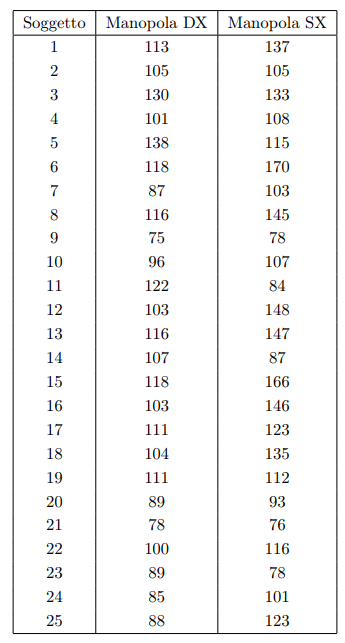

Si imposta un test unilatero a sinistra per dati accoppiati

$H0: \mu_d = 0$<br>
$H1: \mu_d \lt 0$

In [22]:
from scipy.stats import t

sx = np.array([113, 105, 130, 101, 138, 118, 87, 116, 75, 96, 122, 103, 116, 107, 118, 103, 111, 104, 111, 89, 78, 100, 89, 85, 88])
dx = np.array([137, 105, 133, 108, 115, 170, 103, 145,78, 107, 84, 148, 147, 87, 166, 146, 123, 135, 112, 93,76, 116, 78, 101, 123])

alpha = 0.05
n = sx.size

D = np.array(sx - dx)
D_bar = np.mean(D)
S = np.std(D, ddof=1)

T0 = (D_bar/S) * np.sqrt(n)
T = t.ppf(alpha, n-1)

cond = T0 < T
print("Rigetto l'ipotesi nulla" if cond else "Non ho abbastanza elementi per rigettare", end=f" con un valore di significatività di {alpha}\n")

Rigetto l'ipotesi nulla con un valore di significatività di 0.05


### Esercizio 10
Su un campione casuale di 102 individui su cui sono state rilevate due variabili qualitative si sono ottenute le informazioni
riportate nella tabella successiva. Verificare l’ipotesi che le variabili nella popolazione risultino indipendenti al livello di
significatività alpha=0.05.  
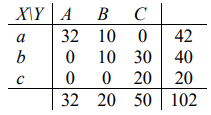

Si imposta un test chi-quadro di indipendenza

H0: X ed Y sono indipenti<br>
H1: X ed Y sono dipendenti

In [36]:
from scipy.stats import chi2

n = 102
alpha = 0.05
m = r = 3

x = np.array([[32, 10, 0], [0, 10, 30], [0, 0, 20]])
p = np.array([42, 40, 20])/n
q = np.array([32, 20, 50])/n
pi = x/n

Tn = 0
for h in range(m):
    for k in range(r):
        if pi[h][k] != 0:
            Tn += ((p[h]*q[k] - pi[h][k])**2)/pi[h][k]
Tn *= n
CHI = chi2.ppf(1-alpha, (m-1)*(r-1))

cond = Tn > CHI
print("Rigetto l'ipotesi nulla" if cond else "Non ho abbastanza elementi per rigettare", end=f" con un valore di significatività di {alpha}\n")

Rigetto l'ipotesi nulla con un valore di significatività di 0.05


### Esercizio 11
Dalla teoria dell’ereditarietà ci si aspetta che certi incroci di varietà di fiori producano fiori gialli, arancioni e rossi con 
probabilità rispettivamente pari a 0.2, 0.5 e 0.3. In un esperimento si ottengono 25 fiori gialli, 55 arancioni e 20 rossi. Si può
concludere che l’esperimento supporta la teoria al livello di significatività del 5%?

Si imposta un test bilatero sulla media a varianza nota

H0: I dati seguono quella distribuzione multnomiale<br>
H1: I dati non seguono quella distribuzione multnomiale

In [45]:
p = np.array([0.2, 0.5, 0.3])
alpha = 0.05
N = np.array([25, 55, 20])
n = np.sum(x)
m = p.size

p_bar = N/n
Tn = n * np.sum(((p_bar - p)**2)/p)
CHI = chi2.ppf(1-alpha, (m-1))

cond = Tn > CHI
print("Rigetto l'ipotesi nulla" if cond else "Non ho abbastanza elementi per rigettare", end=f" con un valore di significatività di {alpha}\n")

Non ho abbastanza elementi per rigettare con un valore di significatività di 0.05


### Esercizio 12
Il direttore di marketing di una nuova catena di supermercati vuole valutare gli effetti sulle vendite 
settimanali della dimensione dello spazio di esposizione. Si seleziona un campione casuale di 12 
negozi e se ne registrano la vendite settimanali. La tabella seguente riporta i risultati del 
campionamento:  
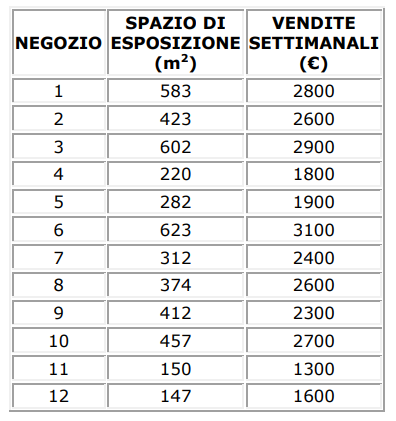  
Si richiede: 
1. Stimare i parametri della retta di regressione, i loro intervalli di confidenza e rappresentare graficamente la retta di regressione.
2. Calcolare la covarianza ed il coefficiente di correlazione lineare. Cosa possiamo dedurre da questi due parametri ?
3. Prevedere l'incasso settimanale di un negozio con un'area di esposizione di 500 m2.
4. Possiamo affermare con un livello di significatività alpha=0.05 che spazio di esposizione e vendite settimanali sono dipendenti? Svolgere l'opportuno test.
5. Effettuare l'analisi dei residui. Che conclusione possiamo trarre?

Intervalli di confidenza per b0: ]791.704, 1433.23[
Intervalli di confidenza per b1: ]2.421, 3.97[


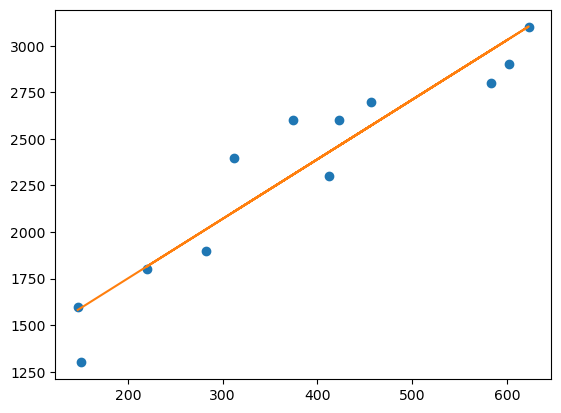

In [55]:
import matplotlib.pyplot as plt

x = np.array([583,423,602,220,282,623,312,374,412,457,150, 147])
y = np.array([2800,2600,2900,1800,1900,3100,2400,2600,2300,2700,1300,1600])
n = x.size
k = 2
alpha = 0.05

x1 = np.ones(n)
x2 = x
X = np.zeros((n, k))
X[:, 0] = x1
X[:, 1] = x2

b = np.linalg.pinv(X)@y
y_hat = X@b
r = y - y_hat

s2 = np.sum(r**2)/(n-k)
s = np.sqrt(s2)
M = np.linalg.inv(X.T @ X)

T = t.ppf(1-alpha/2, n-k)
for i in range(b.size):
    A = b[i] - s*np.sqrt(M[i][i]) * T
    B = b[i] + s*np.sqrt(M[i][i]) * T
    print(f"Intervalli di confidenza per b{i}: ]{A:.3f}, {B:.2f}[")

Y = b[0] + b[1]*x2
plt.plot(x, y, 'o')
plt.plot(x, Y)
plt.show()

In [60]:
x_bar = np.mean(x)
y_bar = np.mean(y)

sig2_y = np.sum((y-y_bar)**2)/n
cov = -x_bar * sig2_y
print(f'Covarianza: {cov:.3f}')

R2 = np.sum((y_hat-y_bar)**2)/np.sum((y-y_bar)**2)
R = np.sqrt(R2)
print(f'Coefficiente di correlazione: {R:.2f}')

Covarianza: -111016435.185
Coefficiente di correlazione: 0.95


In [63]:
x_star = 500
Y = b[0] + b[1]*x_star
print(f'Incasso per {x_star} metri quadri: {Y:.2f}')

Incasso per 500 metri quadri: 2710.11


Si imposta un test di indipendenza bilatero

$H0: \beta_1 = 0$<br>
$H1: \beta_1 \ne 0$

In [65]:
T0 = b[1]/(s*np.sqrt(M[1][1]))
T = t.ppf(1-alpha/2, n-k)

cond = np.abs(T0) >= T
print("Rigetto l'ipotesi nulla, quindi x ed y sono correlate tra di loro" if cond else "Non ho abbastanza elementi per rigettare")

Rigetto l'ipotesi nulla, quindi x ed y sono correlate tra di loro


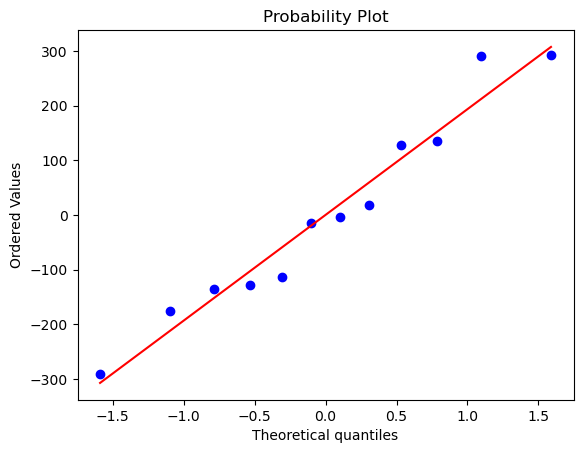

In [72]:
from scipy.stats import probplot

probplot(r, dist=norm, plot=plt)
plt.show()

### Esercizio 13
Si scrivano delle funzioni di Python per generare numeri random con distribuzione: 

- B(1/6, 1/6, 1/6, 1/2)
- U([-1, 11])
- EXP(8)
- N(7, 4)
- χ2(3).

Si generino N=10000 di questi numeri e si confrontino i risultati con le distribuzioni teoriche mediante istogramma e mediante grafico quantile-quantile.

In [108]:
def bernoulli(p):
    x = np.random.rand()
    return 1 if x<=p else 0

def binomiale(p, n):
    return np.array([bernoulli(p) for _ in range(n)])

def multinomiale(p, n):
    M = np.zeros(p.size)
    F = np.cumsum(p)
    for i in range(n):
        xi = np.random.rand()
        x = np.nonzero(xi < F)[0][0]
        M[x] += 1
    return M

def uniforme(a, b, n):
    x = np.random.rand(n)
    y = a + x*(b-a)
    return y

def esponenziale(lam, n):
    x = np.random.rand(n)
    y = - np.log(x)/lam
    return y

def normale(mu, sig, n):
    x = np.random.rand(n)
    xi1 = x[0:int(n/2)]
    xi2 = x[int(n/2):n]
    
    eta1 = np.sqrt(-2*np.log(xi1))*np.cos(2*np.pi*xi2)
    eta2 = np.sqrt(-2*np.log(xi1))*np.sin(2*np.pi*xi2)
    
    y = np.zeros(n)
    y[0 : int(n/2)] = mu + sig*eta1
    y[int(n/2) : n] = mu + sig*eta2
    return y

def chi_quadro(df, n):    
    y = np.array([normale(0, 1, n*df)]) 
    y = y**2
    y2 = y.reshape(df, -1)
    y = np.sum(y2, axis=0)
    return y

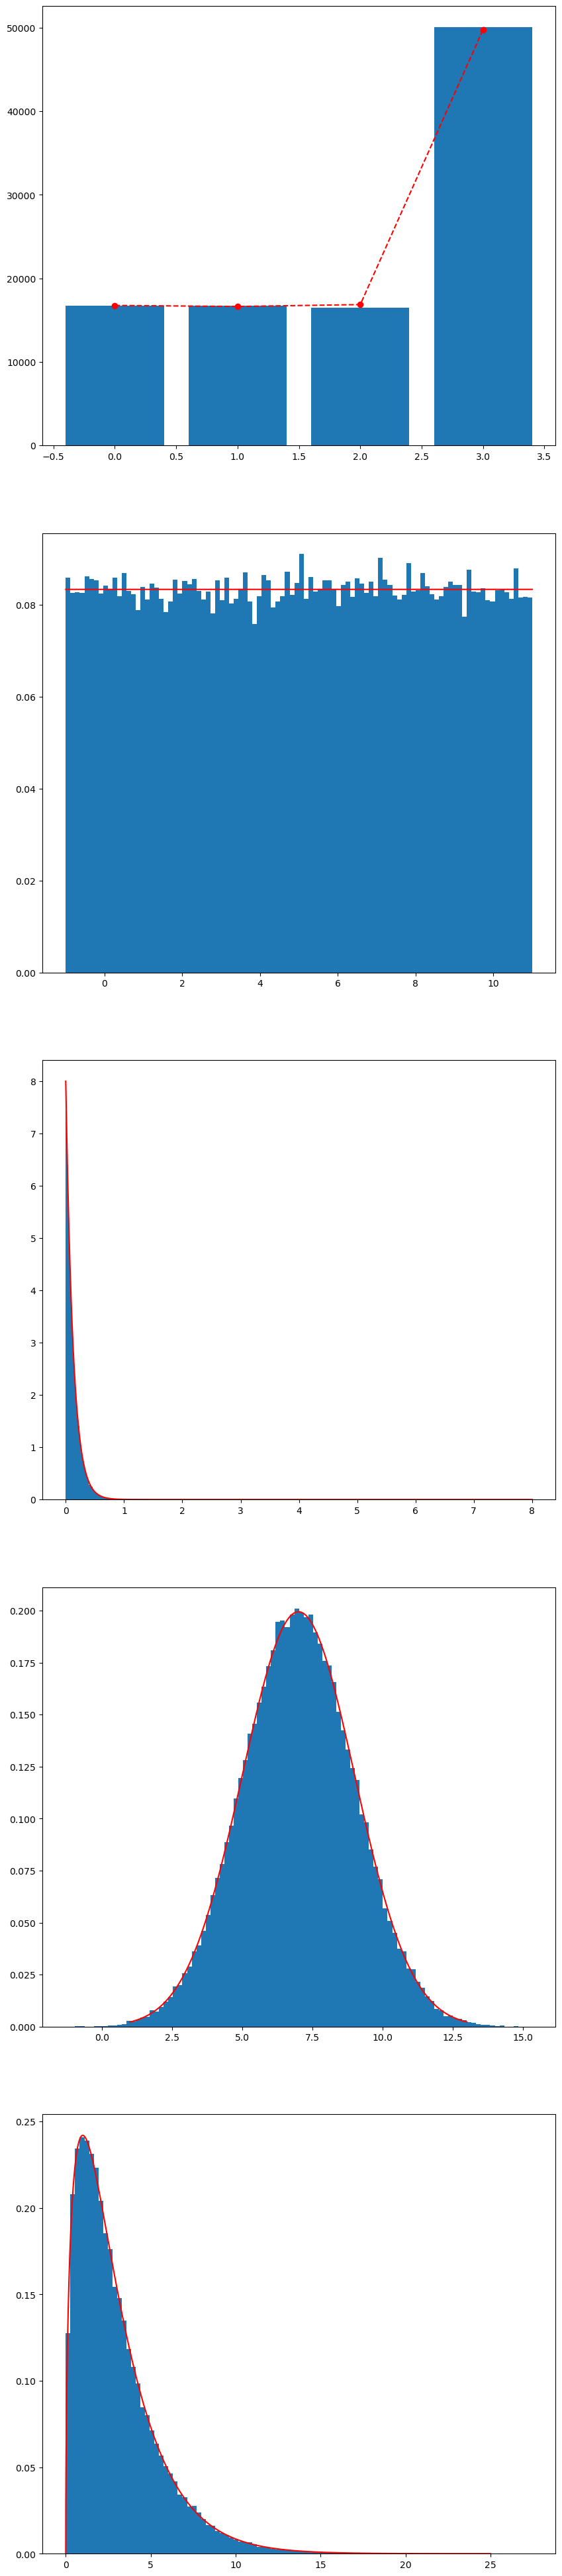

In [128]:
from scipy.stats import uniform, expon

n = 100000

fig, axs = plt.subplots(5, 1, figsize=(10, 50))
(ax1, ax2, ax3, ax4, ax5) = axs.flatten()

# Multinomiale
p = np.array([1/6, 1/6, 1/6, 1/2])
x = np.arange(p.size)
y = multinomiale(p, n)
yy = np.random.multinomial(n, p)
ax1.bar(x, y)
ax1.plot(x, yy, '--o', color='red')

# Uniforme
a = -1
b = 11
x = np.linspace(a, b, n)
y = uniforme(a, b, n)
yy = uniform.pdf(x, a, b-a)
ax2.hist(y, density=True, bins=100)
ax2.plot(x, yy, color='red')

# Esponenziale
lam = 8
x = np.linspace(0, lam, n)
y = esponenziale(lam, n)
yy = expon.pdf(x, scale=1/lam)
ax3.hist(y, density=True, bins=100)
ax3.plot(x, yy, color='red')

# Normale
mu, sig = 7, 2

x = np.linspace(mu- 3*sig, mu+3*sig, n)
y = normale(mu, sig, n)
yy = norm.pdf(x, mu, sig)
ax4.hist(y, density=True, bins=100)
ax4.plot(x, yy, color='red')

# CHI Quadro
df = 3

x = np.linspace(0, 25, n)
y = chi_quadro(df, n)
yy = chi2.pdf(x, df)
ax5.hist(y, density=True, bins=100)
ax5.plot(x, yy, color='red')

plt.show()

### Esercizio 14
Si calcoli la probabilità di avere un pallino rosso con il metodo hit or miss.
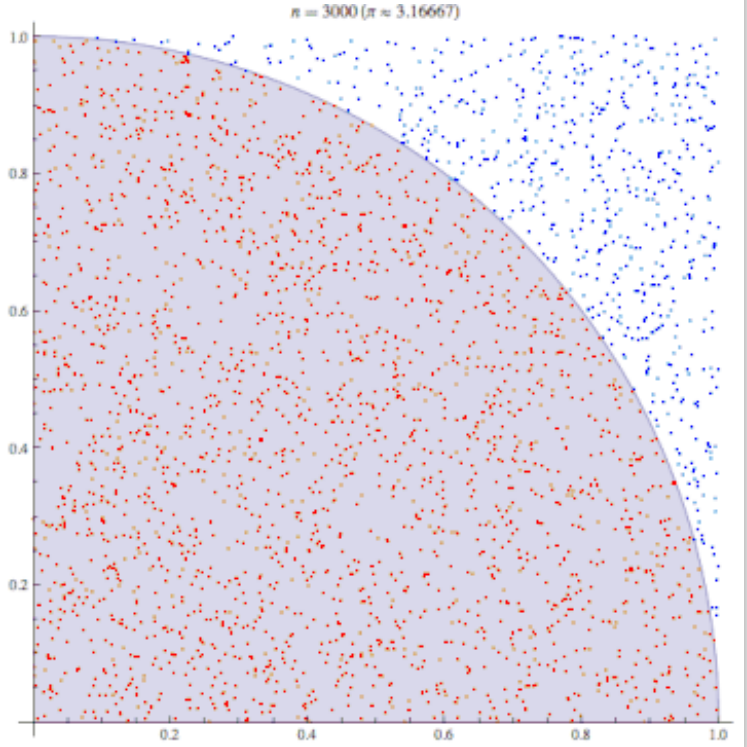

In [136]:
a, b, M = 0, 1, 1

def f(x):
    y = np.sqrt(1 - x**2)
    return y

N = 10000
NS = 0
for i in range(N):
    r1 = np.random.rand()
    r2 = np.random.rand()
    xi = a + r1*(b-a)
    eta = r2*(M)
    if eta <= f(xi):
        NS += 1
    
p = NS/N
print(f'Probabilità: {p:.3f}')

Probabilità: 0.788


### Esercizio 15
 Consideriamo la catena di Markov avente come stati gli N vertici di un
poligono regolare, con la regola seguente: il processo si sposta, ad ogni passo,
sul vertice adiacente in senso orario con probabilità p=0.4, su quello adiacente in
senso antiorario con probabilità q=0.25, mentre resta sul vertice in cui si trova con
probabilità r = 1 − p − q.
1) Scrivere la matrice di transizione per N = 6.
2) Calcolare la distribuzione invariante della catena

# Sezione Bonus (solo per i veri temerari):

### Il prigioniero e la sentinella
Un prigioniero è riuscito a rubare la chiave della sua cella ed è pronto per
tentare la fuga. Tuttavia egli sa che una sentinella pattuglia notte e giorno il
perimetro del carcere. Il carcere è quadrato con quattro porte orientate verso i
quattro punti cardinali, ciascuna nel punto medio di un lato. In ogni momento,
a seconda del lato su cui si trova, la sentinella controlla una delle quattro porte.
Se il prigioniero fosse così sfortunato da uscire proprio da quella porta, verrebbe
sicuramente scoperto. La sentinella passeggia casualmente lungo il perimetro
e ogni tanto inverte la direzione, in modo da rendere imprevedibile la propria
presenza. Nel dilemma su quale porta scegliere per fuggire, il prigioniero ha
raccolto le memorie di un vecchio compagno di prigionia che per lunghi anni
ha potuto osservare i movimenti della sentinella. Egli gli ha confidato di aver
osservato che la sentinella trascorre sempre lo stesso tempo su ogni lato del
quadrato prima di cambiare lato. Inoltre il vecchio prigioniero ha osservato la
frequenza con cui la sentinella si muove da ciascun lato a ciascun altro, e ha
trascritto questa preziosa informazione nella tabella riportata qui sotto.  
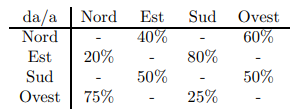  
Per esempio, quando la sentinella si trova a Nord, con probabilità 40% va a Est e con probabilità 60% a Ovest.
1. Da quale delle quattro porte conviene scappare per minimizzare la probabilità di essere scoperto?
2. Qual è la probabilità di essere scoperto?


### Il pronto soccorso
Nel pronto soccorso di un piccolo ospedale sono di turno due medici per volta.
Le richieste dei pazienti vengono classificate in “urgenti” e “non urgenti”. Si
vuole che non capiti mai che entrambi i medici siano impegnati simultaneamente con due pazienti non urgenti e che quindi non ci sia nessuno disponibile per
trattare un eventuale paziente urgente. Infatti, una volta che il trattamento di
un paziente ha avuto inizio, non può essere interrotto. Quindi il pronto soccorso
funziona così: quando entrambi i medici sono liberi, qualunque tipo di paziente viene subito preso in carico; quando uno dei due medici è già impegnato,
il successivo paziente in arrivo viene preso in carico immediatamente solo se è
urgente, altrimenti viene fatto aspettare in sala d’attesa. Per evitare che la coda
di pazienti si allunghi, il pronto soccorso avverte in tempo reale il sistema 118
in modo da dirottare altrove i nuovi pazienti in arrivo. In particolare non vengono più accettati altri pazienti urgenti se i due medici sono entrambi occupati
e nemmeno altri pazienti non urgenti se ce n’è già uno in attesa. Quando gli
arrivi non sono dirottati altrove, i pazienti non-urgenti arrivano con una frequenza media pari ad un paziente ogni quarto d’ora; i pazienti urgenti invece
arrivano mediamente con una frequenza pari a uno ogni tre quarti d’ora. Tutti i
trattamenti durano mediamente venti minuti, sia per i pazienti urgenti che non.
Il direttore sanitario vuole sapere:
1. Per quale frazione di tempo il pronto soccorso risulta saturo per i pazienti
urgenti?
2. Per quale frazione di tempo il pronto soccorso risulta saturo per i pazienti
non urgenti?
3. Qual è la percentuale di utilizzo della forza-lavoro dei medici di turno?
4. Qual è la probabilità che un paziente non urgente venga messo in coda?
5. Come cambierebbero gli indicatori suddetti se i medici servissero sempre
subito tutti i pazienti in arrivo?
6. Come cambierebbero gli indicatori suddetti se i medici fossero tre, mantenendo la politica attuale di non occupare l’ultimo medico disponibile se
l’ultimo paziente arrivato non è urgente?


### Il cavallo pazzo  
Su una scacchiera di 4x4 caselle, c’è un cavallo pazzo. Ad ogni mossa salta
secondo le regole degli scacchi con una probabilità uguale per ciascuna mossa
possibile: se ha due mosse possibili, ciascuna ha probabilità 1/2; se ne ha tre,
ognuna ha probabilità 1/3 e così via.
1. Dopo un grande numero di mosse (quando l’effetto della posizione iniziale
non conta più), qual è la probabilità di trovare il Cavallo nella casella in
basso a sinistra?
2. Qual è la probabilità di trovarlo in una qualsiasi delle quattro caselle
centrali?

### Il distributore di benzina
Ad un distributore di benzina arriva mediamente un’automobile ogni minuto.
Tuttavia gli automobilisti osservano la coda e decidono se restare o andarsene in
cerca di un altro distributore. Si è osservato che quando c’è già un automobilista
nella stazione, in media due volte su tre chi arriva decide di restare in coda; se
ci sono già due automobilisti, in media una volta su tre chi arriva si mette in
coda; se ci sono già tre automobilisti, nessuno più si aggiunge alla coda. Il
rifornimento dura mediamente cinque minuti.
1. Quanti automobilisti ci sono mediamente nella stazione?
2. A che valore dovrebbe scendere il tempo medio di rifornimento per garantire una presenza media di non più di due automobilisti nella stazione?